In [1]:
import nltk
from nltk.tag import StanfordNERTagger
from nltk.metrics.scores import accuracy


raw_annotations = open("./text_analysis/eng.testb").read()
split_annotations = raw_annotations.split()

# Amend class annotations to reflect Stanford's NERTagger
for n,i in enumerate(split_annotations):
    if i == "I-PER":
        split_annotations[n] = "PERSON"
    if i == "I-ORG":
        split_annotations[n] = "ORGANIZATION"
    if i == "I-LOC":
        split_annotations[n] = "LOCATION"

# Group NE data into tuples
def group(lst, n):
    for i in range(0, len(lst), n):
        val = lst[i:i+n]
        if len(val) == n:
            yield tuple(val)

reference_annotations = list(group(split_annotations, 4))
pure_tokens = split_annotations[::4]
tagged_words = nltk.pos_tag(pure_tokens)
nltk_unformatted_prediction = nltk.ne_chunk(tagged_words)
for i in range(0, len(reference_annotations)):
    reference_annotations[i] = (reference_annotations[i][0], reference_annotations[i][3])
reference_annotations

[('-DOCSTART-', 'O'),
 ('SOCCER', 'O'),
 ('-', 'O'),
 ('JAPAN', 'LOCATION'),
 ('GET', 'O'),
 ('LUCKY', 'O'),
 ('WIN', 'O'),
 (',', 'O'),
 ('CHINA', 'PERSON'),
 ('IN', 'O'),
 ('SURPRISE', 'O'),
 ('DEFEAT', 'O'),
 ('.', 'O'),
 ('Nadim', 'PERSON'),
 ('Ladki', 'PERSON'),
 ('AL-AIN', 'LOCATION'),
 (',', 'O'),
 ('United', 'LOCATION'),
 ('Arab', 'LOCATION'),
 ('Emirates', 'LOCATION'),
 ('1996-12-06', 'O'),
 ('Japan', 'LOCATION'),
 ('began', 'O'),
 ('the', 'O'),
 ('defence', 'O'),
 ('of', 'O'),
 ('their', 'O'),
 ('Asian', 'I-MISC'),
 ('Cup', 'I-MISC'),
 ('title', 'O'),
 ('with', 'O'),
 ('a', 'O'),
 ('lucky', 'O'),
 ('2-1', 'O'),
 ('win', 'O'),
 ('against', 'O'),
 ('Syria', 'LOCATION'),
 ('in', 'O'),
 ('a', 'O'),
 ('Group', 'O'),
 ('C', 'O'),
 ('championship', 'O'),
 ('match', 'O'),
 ('on', 'O'),
 ('Friday', 'O'),
 ('.', 'O'),
 ('But', 'O'),
 ('China', 'LOCATION'),
 ('saw', 'O'),
 ('their', 'O'),
 ('luck', 'O'),
 ('desert', 'O'),
 ('them', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('second', 'O'),
 (

In [2]:
#Convert prediction to multiline string and then to list (includes pos tags)
multiline_string = nltk.chunk.tree2conllstr(nltk_unformatted_prediction)
listed_pos_and_ne = multiline_string.split()

# Delete pos tags and rename
del listed_pos_and_ne[1::3]
listed_ne = listed_pos_and_ne

# Amend class annotations for consistency with reference_annotations
for n,i in enumerate(listed_ne):
    if i == "B-PERSON":
        listed_ne[n] = "PERSON"
    if i == "I-PERSON":
        listed_ne[n] = "PERSON"    
    if i == "B-ORGANIZATION":
        listed_ne[n] = "ORGANIZATION"
    if i == "I-ORGANIZATION":
        listed_ne[n] = "ORGANIZATION"
    if i == "B-LOCATION":
        listed_ne[n] = "LOCATION"
    if i == "I-LOCATION":
        listed_ne[n] = "LOCATION"
    if i == "B-GPE":
        listed_ne[n] = "LOCATION"
if i == "I-GPE":
        listed_ne[n] = "LOCATION"

# Group prediction into tuples
nltk_formatted_prediction = list(group(listed_ne, 2))
nltk_formatted_prediction

[('-DOCSTART-', 'O'),
 ('SOCCER', 'ORGANIZATION'),
 ('-', 'O'),
 ('JAPAN', 'ORGANIZATION'),
 ('GET', 'O'),
 ('LUCKY', 'O'),
 ('WIN', 'O'),
 (',', 'O'),
 ('CHINA', 'LOCATION'),
 ('IN', 'O'),
 ('SURPRISE', 'O'),
 ('DEFEAT', 'O'),
 ('.', 'O'),
 ('Nadim', 'PERSON'),
 ('Ladki', 'PERSON'),
 ('AL-AIN', 'O'),
 (',', 'O'),
 ('United', 'LOCATION'),
 ('Arab', 'PERSON'),
 ('Emirates', 'PERSON'),
 ('1996-12-06', 'O'),
 ('Japan', 'LOCATION'),
 ('began', 'O'),
 ('the', 'O'),
 ('defence', 'O'),
 ('of', 'O'),
 ('their', 'O'),
 ('Asian', 'LOCATION'),
 ('Cup', 'O'),
 ('title', 'O'),
 ('with', 'O'),
 ('a', 'O'),
 ('lucky', 'O'),
 ('2-1', 'O'),
 ('win', 'O'),
 ('against', 'O'),
 ('Syria', 'B-GSP'),
 ('in', 'O'),
 ('a', 'O'),
 ('Group', 'O'),
 ('C', 'O'),
 ('championship', 'O'),
 ('match', 'O'),
 ('on', 'O'),
 ('Friday', 'O'),
 ('.', 'O'),
 ('But', 'O'),
 ('China', 'LOCATION'),
 ('saw', 'O'),
 ('their', 'O'),
 ('luck', 'O'),
 ('desert', 'O'),
 ('them', 'O'),
 ('in', 'O'),
 ('the', 'O'),
 ('second', 'O'),
 (

In [3]:
nltk_accuracy = accuracy(reference_annotations, nltk_formatted_prediction)
print(nltk_accuracy)

0.8985985514078773


In [4]:
nerfile = '../stanford-ner-2018-10-16/stanford-ner.jar'
modelfile = '../stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz'

st = StanfordNERTagger(modelfile, nerfile, encoding='utf-8')                  
stanford_prediction = st.tag(pure_tokens)
stanford_accuracy = accuracy(reference_annotations, stanford_prediction)
print(stanford_accuracy)

0.9540779153987914


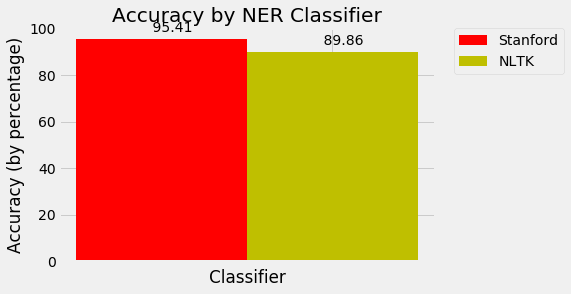

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

stanford_percentage = stanford_accuracy * 100
rects1 = ax.bar(ind, stanford_percentage, width, color='r')

nltk_percentage = nltk_accuracy * 100
rects2 = ax.bar(ind+width, nltk_percentage, width, color='y')

# add some text for labels, title and axes ticks
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy (by percentage)')
ax.set_title('Accuracy by NER Classifier')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('') )

ax.legend( (rects1[0], rects2[0]), ('Stanford', 'NLTK'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%10.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()